Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'var_smoothing': 1e-10}
Accuracy: 0.8090
Precision: 0.9714
Recall: 0.6800
F1 Score: 0.8000


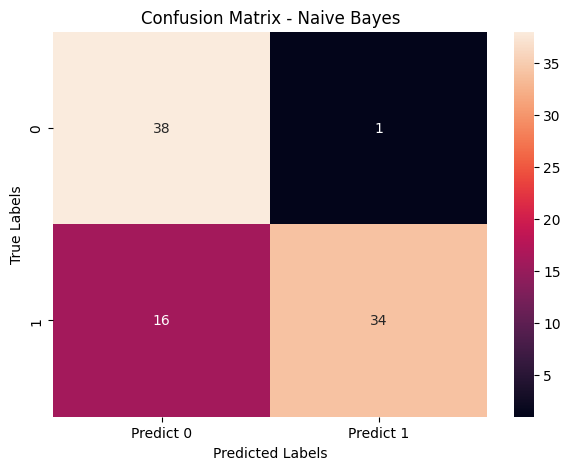

TP = 34
TN = 38
FN = 16
FP = 1
ACCURACY of model is: 80.90%
SENSITIVITY of the model is: 68.00%
SPECIFICITY of the model is: 97.44%
FALSE POSITIVE RATE of the model is: 2.56%
PRECISION of the model is: 97.14%
Classification Report - Naive Bayes
              precision    recall  f1-score   support

           1       0.97      0.68      0.80        50
           0       0.70      0.97      0.82        39

    accuracy                           0.81        89
   macro avg       0.84      0.83      0.81        89
weighted avg       0.85      0.81      0.81        89

Model saved as 'naive_bayes_model.pkl'


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
import joblib  # Import joblib for saving the model

# Load the dataset
data_path = 'Data - Parkinsons.csv'
pdata = pd.read_csv(data_path)

# Data preprocessing
pdata = pdata.drop(['name'], axis=1)  # Drop non-numeric or unnecessary columns
X = pdata.drop(['status'], axis=1)
y = pdata[['status']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Feature selection (choosing a subset of features)
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X_resampled, y_resampled.values.ravel())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.30, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6]  # Extended range for var_smoothing
}

# Create a GaussianNB model
gnb = GaussianNB()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train.values.ravel())

# Get best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the best model
best_gnb = grid_search.best_estimator_
y_predicted_gnb = best_gnb.predict(X_test)

# Calculate and print the metrics
accuracy = accuracy_score(y_test, y_predicted_gnb)
precision = precision_score(y_test, y_predicted_gnb)
recall = recall_score(y_test, y_predicted_gnb)
f1 = f1_score(y_test, y_predicted_gnb)
conf_matrix = confusion_matrix(y_test, y_predicted_gnb)

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot the confusion matrix
df_cm_gnb = pd.DataFrame(conf_matrix, index=['0', '1'], columns=['Predict 0', 'Predict 1'])
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm_gnb, annot=True, fmt='g')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Additional metrics
TN, FP, FN, TP = conf_matrix.ravel()
print("TP =", TP)
print("TN =", TN)
print("FN =", FN)
print("FP =", FP)
print(f'ACCURACY of model is: {(TP + TN) / float(TP + TN + FN + FP) * 100:.2f}%')
print(f'SENSITIVITY of the model is: {TP / float(TP + FN) * 100:.2f}%')
print(f'SPECIFICITY of the model is: {TN / float(TN + FP) * 100:.2f}%')
print(f'FALSE POSITIVE RATE of the model is: {FP / float(TN + FP) * 100:.2f}%')
print(f'PRECISION of the model is: {TP / float(TP + FP) * 100:.2f}%')
print("Classification Report - Naive Bayes")
print(classification_report(y_test, y_predicted_gnb, labels=[1, 0]))

# Save the model
joblib.dump(best_gnb, 'naive_bayes_model.pkl')
print("Model saved as 'naive_bayes_model.pkl'")
